Article: N/A\
Code: Sentiment Analysis using LSTM\
Prepared By: Awais Naeem (awais.naeem@embedded-robotics.com)\
Copyrights: www.embedded-robotics.com\
Disclaimer: This code can be distributed with the proper mention of the owner copyrights

In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [16]:
reviews = pd.read_csv('IMDB Dataset.csv')
reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [17]:
reviews['sentiment'] = np.where(reviews['sentiment'] == 'positive', 1, 0)

In [18]:
sentences = reviews['review'].to_numpy()
labels = reviews['sentiment'].to_numpy()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.25)
print("Training Data Input Shape: ", X_train.shape)
print("Training Data Output Shape: ", y_train.shape)
print("Testing Data Input Shape: ", X_test.shape)
print("Testing Data Output Shape: ", y_test.shape)

Training Data Input Shape:  (37500,)
Training Data Output Shape:  (37500,)
Testing Data Input Shape:  (12500,)
Testing Data Output Shape:  (12500,)


In [20]:
vocab_size = 10000
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

In [21]:
tokenizer.fit_on_texts(X_train)
print("Number of Documents: ", tokenizer.document_count)
print("Number of Words: ", tokenizer.num_words)

Number of Documents:  37500
Number of Words:  10000


In [22]:
tokenizer.word_counts

OrderedDict([('a', 242147),
             ('true', 3404),
             ('hero', 1457),
             ('of', 217518),
             ('modern', 1346),
             ('times', 4672),
             ('chuck', 233),
             ('norris', 135),
             ('has', 24757),
             ('left', 3127),
             ('tv', 4246),
             ('walker', 220),
             ('rexas', 1),
             ('ranger', 143),
             ('and', 242868),
             ('is', 158393),
             ('looking', 3828),
             ('new', 6079),
             ('steps', 229),
             ('for', 65652),
             ('his', 43011),
             ('artistic', 493),
             ('career', 1479),
             ('the', 501267),
             ('president´s', 2),
             ('man', 8231),
             ('second', 2904),
             ('movie', 65696),
             ('future', 1230),
             ('series', 4974),
             ('with', 65575),
             ('in', 139759),
             ('title', 2271),
             ('role'

In [23]:
tokenizer.word_docs

defaultdict(int,
            {'next': 2326,
             'in': 32968,
             'plenty': 810,
             'judson': 4,
             'tv': 3208,
             'before': 5355,
             'left': 2733,
             'this': 33973,
             'be': 21174,
             'teachs': 1,
             'action': 3418,
             'career': 1285,
             'like': 17395,
             'walker': 145,
             'world': 4020,
             'old': 5020,
             'br': 21885,
             'usa': 232,
             'rexas': 1,
             'surprise': 956,
             'heroism': 41,
             'actors': 5368,
             'a': 36226,
             'young': 3926,
             'reached': 172,
             'most': 9710,
             'modern': 1161,
             'rangers': 67,
             'tragic': 458,
             'or': 15442,
             'has': 14911,
             'second': 2544,
             'times': 4043,
             'son': 1336,
             'his': 15793,
             'many': 7557,


In [28]:
train_sequences = tokenizer.texts_to_sequences(X_train)
print(train_sequences[0])

[4, 285, 633, 5, 686, 217, 2995, 4565, 46, 313, 239, 3126, 1, 4369, 3, 7, 257, 168, 3030, 17, 25, 1637, 623, 2, 1, 129, 7, 2, 329, 16, 5, 4, 743, 239, 199, 18, 4565, 9, 2, 417, 212, 3, 18, 192, 154, 38, 1993, 1, 39, 1, 8534, 28, 5, 2, 192, 5470, 5, 3126, 2, 157, 1226, 1, 6, 192, 1, 8889, 28, 5, 2, 89, 965, 1407, 5, 2, 1, 129, 9, 12, 1, 4, 345, 9, 2, 5063, 46, 3659, 183, 858, 17, 25, 1, 5, 7818, 9, 2771, 1915, 160, 2, 1644, 5399, 1648, 2195, 4565, 500, 5, 2995, 7, 2, 165, 2, 16, 7, 1171, 4, 50, 204, 158, 998, 5, 1880, 3, 1, 2995, 4565, 26, 108, 2388, 17, 2, 743, 1, 5, 3041, 25, 367, 435, 79, 27, 2, 944, 8, 8]


In [15]:
sequence_length = 200
train_padded = pad_sequences(train_sequences, maxlen=sequence_length, padding='post', truncating='post')

In [16]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=sequence_length, padding='post', truncating='post')

In [17]:
embedding_dim = 16
lstm_out = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=sequence_length))
model.add(Bidirectional(LSTM(lstm_out)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 173,205
Trainable params: 173,205
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
checkpoint_filepath = os.getcwd()
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_loss', mode='min', save_best_only=True)
callbacks = [EarlyStopping(patience=2), model_checkpoint_callback]

In [22]:
history = model.fit(train_padded, y_train, epochs=10, validation_data=(test_padded, y_test), callbacks=callbacks)

Epoch 1/10
1172/1172 [==============================] - ETA: 0s - loss: 0.2366 - accuracy: 0.9090

INFO:tensorflow:Assets written to: e:\Embedded Robotics\Blog Articles\Data Science\datascience\imdb_reviews_LSTM_sentiment_analysis\assets


INFO:tensorflow:Assets written to: e:\Embedded Robotics\Blog Articles\Data Science\datascience\imdb_reviews_LSTM_sentiment_analysis\assets


1172/1172 [==============================] - 348s 297ms/step - loss: 0.2366 - accuracy: 0.9090 - val_loss: 0.3293 - val_accuracy: 0.8581
Epoch 2/10
1172/1172 [==============================] - 220s 188ms/step - loss: 0.2044 - accuracy: 0.9228 - val_loss: 0.3471 - val_accuracy: 0.8611
Epoch 3/10
1172/1172 [==============================] - 205s 175ms/step - loss: 0.1779 - accuracy: 0.9325 - val_loss: 0.3807 - val_accuracy: 0.8478


In [23]:
metrics_df = pd.DataFrame(history.history)
print(metrics_df)

       loss  accuracy  val_loss  val_accuracy
0  0.236580   0.90904  0.329251       0.85808
1  0.204433   0.92280  0.347143       0.86112
2  0.177877   0.93248  0.380667       0.84776


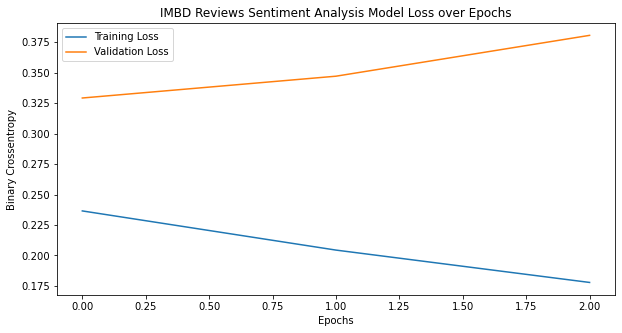

In [24]:
plt.figure(figsize=(10,5))
plt.plot(metrics_df.index, metrics_df.loss)
plt.plot(metrics_df.index, metrics_df.val_loss)
plt.title('IMBD Reviews Sentiment Analysis Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

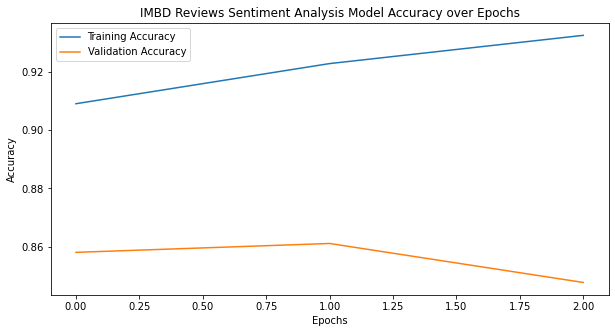

In [25]:
plt.figure(figsize=(10,5))
plt.plot(metrics_df.index, metrics_df.accuracy)
plt.plot(metrics_df.index, metrics_df.val_accuracy)
plt.title('IMBD Reviews Sentiment Analysis Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()